In [26]:
import pandas as pd
import numpy as np


In [27]:
#################################################UA_CARS#########################################################


In [28]:
import os
os.chdir("/Users/nnovakova/python/")
print(os.getcwd())

/Users/nnovakova/python


In [29]:
ua_cars=pd.read_csv("cars/ua_vehicle_price.csv")

In [30]:
ua_cars.columns


Index(['brand', 'model', 'year', 'body', 'price$', 'car_mileage', 'fuel',
       'power', 'transmission'],
      dtype='object')

In [31]:
ua_cars.head(10)

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,ford,transit,2006,other,5350,220,diesel,2.0,manual
1,renault,master,2017,other,17000,211,diesel,2.3,manual
2,opel,vivaro,2015,other,15200,157,diesel,1.6,manual
3,ford,transit,2000,other,4999,300,diesel,2.4,manual
4,mercedes-benz,sprinter,2010,other,20700,682,diesel,3.0,automatic
5,tesla,model,2017,other,68888,39,NaN,NaN,other
6,volkswagen,t4,2002,other,12900,270,diesel,2.5,manual
7,bmw,530,2000,other,6999,331,diesel,3.0,automatic
8,volkswagen,caddy,2004,other,7300,230,diesel,1.9,manual
9,opel,vivaro,2007,other,8500,180,diesel,2.5,manual


<AxesSubplot:>

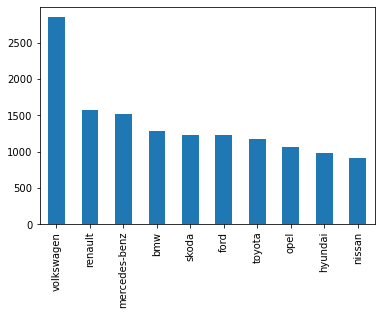

In [32]:
#Total count cars by brands
ua_cars["brand"].value_counts().head(10).plot(kind='bar')

In [33]:
#Statistic for numerical features
ua_cars.describe()

,year,car_mileage,power
count,22867.000000,22867.000000,21464.000000
mean,2009.451918,215.176193,2.125814
std,6.215080,3273.616921,0.945958
min,1948.000000,0.000000,0.100000
25%,2007.000000,90.000000,1.600000
50%,2010.000000,154.000000,2.000000
75%,2014.000000,205.000000,2.400000
max,2020.000000,339000.000000,35.000000


In [34]:
#Statistic for categorical features
ua_cars.astype('object').describe().transpose()

,count,unique,top,freq
brand,22867,93,volkswagen,2851
model,22867,916,passat,858
year,22867,59,2008,2166
body,22867,12,sedan,6625
price$,22867,2012,6500,246
car_mileage,22867,531,200,366
fuel,21140,3,diesel,8705
power,21464,125,2,4489
transmission,22593,5,manual,10679


In [35]:
# All possible cars models in ua_cars DataFrame
ua_cars["model"].unique()

array(['transit', 'master', 'vivaro', 'sprinter', 'model', 't4', '530',
       'caddy', 'panamera', 't6', '308', 'vito', 'trafic', 'fortwo',
       'ducato', 'insignia', 't5', 'l', 'a7', 'dokker', '80', 'crafter',
       'caravelle', 'movano', 'multivan', 'outlander', 'zafira', 'land',
       'e', '2114', 'primastar', 'kangoo', 'doblo', 'meriva', 'combo',
       'jumper', 'berlingo', 'cooper', 'ceed', 'boxer', 'viano', 'v',
       'lt', '500', 'rav4', 'punto', '3302', '2121', 'a5', 'partner',
       'soul', 'golf', 'h', '33021', 't2', '2705', '210', '452', 'expert',
       'accord', 'fusion', 'passat', 'mondeo', 'jetta', 'camry', '100',
       'c3', 'c', 'kalina', 'epica', 'legacy', 's', 'elantra', '520',
       '1103', '523', 'rio', 'm35', 'logan', '525', 'volt', 'accent',
       'octavia', 'sens', 'a4', '528', 'a6', 'lanos', 'omega', '3', '316',
       '745', '6', 'focus', 'optima', 'a8', '320', 'lancer', 'fiesta',
       'quattroporte', 'xf', 'aveo', 'gs', 'cc', 'mkz', 'cerato', 'xj

In [36]:
# All possible transmission types in ua_cars DataFrame
ua_cars["transmission"].unique()

array(['manual', 'automatic', 'other', 'typtronik', 'adaptive', nan],
      dtype=object)

In [37]:
# Colums info for ua_cars DataFrame
ua_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22867 entries, 0 to 22866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         22867 non-null  object 
 1   model         22867 non-null  object 
 2   year          22867 non-null  int64  
 3   body          22867 non-null  object 
 4   price$        22867 non-null  object 
 5   car_mileage   22867 non-null  int64  
 6   fuel          21140 non-null  object 
 7   power         21464 non-null  float64
 8   transmission  22593 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [38]:
#Rename colums in ua_cars DataFrame
ua_cars.rename(columns={"price$":"price","car_mileage":"mileage"},inplace = True)

In [39]:
#As we see in info some colums should have another type as they have 
#Price is object/ should be integer or float
#Change pryce column type
ua_cars[["price"]] = ua_cars[["price"]].apply(pd.to_numeric,errors='coerce') 
ua_cars.head(5)
ua_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22867 entries, 0 to 22866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         22867 non-null  object 
 1   model         22867 non-null  object 
 2   year          22867 non-null  int64  
 3   body          22867 non-null  object 
 4   price         22864 non-null  float64
 5   mileage       22867 non-null  int64  
 6   fuel          21140 non-null  object 
 7   power         21464 non-null  float64
 8   transmission  22593 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [40]:
#Group cars by transmission and years and calculate theirs count
ua_transmission = ua_cars.groupby(['transmission','year'])['year'].count().reset_index(name='count')
print(ua_transmission)

    transmission  year  count
0       adaptive  2004      1
1       adaptive  2006      3
2       adaptive  2007      1
3       adaptive  2008      7
4       adaptive  2009      3
..           ...   ...    ...
167    typtronik  2016     74
168    typtronik  2017     48
169    typtronik  2018     33
170    typtronik  2019     38
171    typtronik  2020      1

[172 rows x 3 columns]


In [41]:
#Extract main transmission types in separate dataframes 
ua_adaptive_transmission=ua_transmission[ua_transmission['transmission']=='adaptive']

ua_automatic_transmission=ua_transmission[ua_transmission['transmission']=='automatic']

ua_manual_transmission=ua_transmission[ua_transmission['transmission']=='manual']


In [42]:
#import plotly lib for the further visua;lisation
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [43]:
adaptive_trace = go.Bar(
    x = ua_adaptive_transmission.year,
    y = ua_adaptive_transmission['count'],
    name = "adaptive transmission"
)
automatic_trace = go.Bar(
    x = ua_automatic_transmission.year,
    y = ua_automatic_transmission['count'],
    name = "automatic transmission"
)
manual_trace = go.Bar(
    x = ua_manual_transmission.year,
    y = ua_manual_transmission['count'],
    name = "manual transmission"
)
layout = go.Layout(
    title='Amount of cars sold during a year by transmission types',\
    xaxis= {'title':"years"},yaxis = {'title':"total amount of cars"},)


fig = go.Figure(data = [adaptive_trace,automatic_trace,manual_trace], layout = layout)
iplot(fig)

In [44]:
#Total Toyota/VolksWagen sales by year
max_price = ua_cars.groupby(['brand', 'year'])['price'].max() \
  .reset_index(name='price').sort_values(['year'], ascending=False) 

print(max_price[max_price['brand']=='toyota'])

toyota_price=max_price[max_price['brand']=='toyota']
vw_price=max_price[max_price['brand']=='volkswagen']

       brand  year     price
1055  toyota  2020   98999.0
1054  toyota  2019  189999.0
1053  toyota  2018  115555.0
1052  toyota  2017   79999.0
1051  toyota  2016   66999.0
1050  toyota  2015  104999.0
1049  toyota  2014   47999.0
1048  toyota  2013   47777.0
1047  toyota  2012   44900.0
1046  toyota  2011   42690.0
1045  toyota  2010   35500.0
1044  toyota  2009   28900.0
1043  toyota  2008   43333.0
1042  toyota  2007   31500.0
1041  toyota  2006   29900.0
1040  toyota  2005   21000.0
1039  toyota  2004   22500.0
1038  toyota  2003   16000.0
1037  toyota  2002   18700.0
1036  toyota  2001   15000.0
1035  toyota  2000    8200.0
1034  toyota  1999   16000.0
1033  toyota  1998   11500.0
1032  toyota  1997   11900.0
1031  toyota  1996    9500.0
1030  toyota  1995    5300.0
1029  toyota  1994    4500.0
1028  toyota  1993   11000.0
1027  toyota  1992    4700.0
1026  toyota  1990    3750.0
1025  toyota  1989    1650.0
1024  toyota  1988    1500.0
1023  toyota  1987     950.0
1022  toyota  

In [45]:
toyota_trace = go.Scatter(
    x = toyota_price.year,
    y = toyota_price['price'],
    name = 'Toyota'
)
vw_trace = go.Scatter(
    x = vw_price.year,
    y = vw_price['price'],
    name= 'VolksWagen'
)
layout = go.Layout(
    title='Total sales by year',\
    xaxis= {'title':"years"},yaxis = {'title':"total sales,K$"}
)

fig = go.Figure(data = [toyota_trace,vw_trace], layout = layout)
iplot(fig)

In [46]:
#################################################US_CARS#########################################################

In [47]:
us_cars = pd.read_csv("cars/usa_vehicles_price.csv")

In [48]:
us_cars.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [49]:
us_cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [50]:
us_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [51]:
print(us_cars["condition"].unique())
print(us_cars["country"].unique())
print(us_cars["title_status"].unique())

['10 days left' '6 days left' '2 days left' '22 hours left'
 '20 hours left' '19 hours left' '3 days left' '21 hours left'
 '17 hours left' '2 hours left' '3 hours left' '34 minutes'
 '16 hours left' '18 hours left' '1 days left' '32 minutes'
 '14 hours left' '5 hours left' '4 days left' '9 days left'
 '23 hours left' '8 days left' '7 days left' '5 days left' '9 minutes'
 '1 minutes' '7 hours left' '16 minutes' '6 hours left' '1 hours left'
 'Listing Expired' '13 days left' '24 hours left' '15 hours left'
 '53 minutes' '27 minutes' '12 days left' '15 days left' '30 minutes'
 '29 minutes' '28 minutes' '48 minutes' '11 days left' '4 hours left'
 '47 minutes' '12 hours left' '36 minutes']
[' usa' ' canada']
['clean vehicle' 'salvage insurance']


In [52]:
us_cars = us_cars.drop(['Unnamed: 0','vin',"condition","lot","title_status"],axis = 1)
us_cars.head()

,price,brand,model,year,mileage,color,state,country
0,6300,toyota,cruiser,2008,274117.0,black,new jersey,usa
1,2899,ford,se,2011,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,39590.0,silver,georgia,usa
3,25000,ford,door,2014,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,6654.0,red,florida,usa


In [53]:
us_cars['mileage']=(us_cars['mileage']*1.60934/1000).round(0).astype(int)
us_cars.head()

,price,brand,model,year,mileage,color,state,country
0,6300,toyota,cruiser,2008,441,black,new jersey,usa
1,2899,ford,se,2011,307,silver,tennessee,usa
2,5350,dodge,mpv,2018,64,silver,georgia,usa
3,25000,ford,door,2014,103,blue,virginia,usa
4,27700,chevrolet,1500,2018,11,red,florida,usa


In [54]:
us_cars= us_cars[us_cars['country']==' usa']
us_cars = us_cars.drop(["country"],axis = 1)
us_cars.head()

,price,brand,model,year,mileage,color,state
0,6300,toyota,cruiser,2008,441,black,new jersey
1,2899,ford,se,2011,307,silver,tennessee
2,5350,dodge,mpv,2018,64,silver,georgia
3,25000,ford,door,2014,103,blue,virginia
4,27700,chevrolet,1500,2018,11,red,florida


In [55]:
us_cars["brand"].value_counts().head(10)

ford         1235
dodge         426
nissan        312
chevrolet     296
gmc            42
jeep           30
chrysler       18
bmw            17
hyundai        15
kia            13
Name: brand, dtype: int64

<AxesSubplot:>

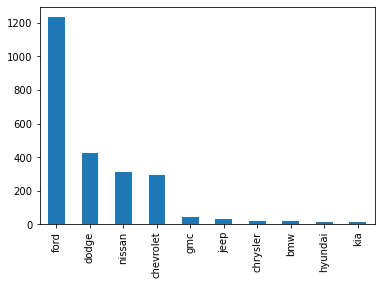

In [56]:

us_cars["brand"].value_counts().head(10).plot(kind='bar')

In [57]:
us_cars.describe()

,price,year,mileage
count,2492.000000,2492.000000,2492.000000
mean,18735.116774,2016.708266,84.189406
std,12117.360379,3.445563,96.212678
min,0.000000,1973.000000,0.000000
25%,10200.000000,2016.000000,34.000000
50%,16894.000000,2018.000000,57.000000
75%,25500.000000,2019.000000,103.000000
max,84900.000000,2020.000000,1638.000000


In [58]:
us_cars.astype('object').describe().transpose()

,count,unique,top,freq
price,2492,790,0,43
brand,2492,28,ford,1235
model,2492,127,door,651
year,2492,30,2019,886
mileage,2492,323,54,38
color,2492,49,white,702
state,2492,43,pennsylvania,299


In [59]:
us_cars.describe(include=["object"])

,brand,model,color,state
count,2492,2492,2492,2492
unique,28,127,49,43
top,ford,door,white,pennsylvania
freq,1235,651,702,299


In [60]:
cars_by_brand = us_cars.groupby('brand')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
import plotly.express as pl
fig = pl.bar(cars_by_brand, x='brand', y='model')
fig.show()

In [71]:
car_by_colors = us_cars.groupby('color')['model'].count().reset_index().sort_values('model',ascending = False).head(5)

In [62]:
fig= pl.bar(car_by_colors, x='color',y='model')

In [63]:
fig.show()

In [64]:
max_price_us = us_cars.groupby(['brand', 'year'])['price'].max() \
  .reset_index(name='price').sort_values(['year'], ascending=False) 

ford_price=max_price[max_price['brand']=='ford']
dodge_price=max_price[max_price['brand']=='dodge']
nissan_price=max_price[max_price['brand']=='nissan']
chevrolet_price=max_price[max_price['brand']=='chevrolet']

In [65]:
ford_trace = go.Scatter(
    x = ford_price.year,
    y = ford_price['price'],
    name = 'Ford'
)
dodge_trace = go.Scatter(
    x = vw_price.year,
    y = vw_price['price'],
    name= 'Dodge'
)
nissan_trace = go.Scatter(
    x = nissan_price.year,
    y = nissan_price['price'],
    name= 'Nissan'
)
chevrolet_trace = go.Scatter(
    x = chevrolet_price.year,
    y = chevrolet_price['price'],
    name= 'Chevrolet'
)

layout = go.Layout(
    title='Total sales by year',\
    xaxis= {'title':"years"},yaxis = {'title':"total sales,K$"}
)

fig = go.Figure(data = [ford_trace,dodge_trace,nissan_trace,chevrolet_trace], layout = layout)
iplot(fig)

In [66]:
car_by_state = us_cars.groupby(['state','brand'])['price'].max().reset_index(name='price')
print(car_by_state)
fig= pl.bar(car_by_state, x='brand',y='state')
fig.show()


#max_price = ua_cars.groupby(['brand', 'year'])['price'].max() \
 # .reset_index(name='price').sort_values(['year'], ascending=False) 

         state      brand  price
0      alabama      dodge   6200
1      alabama       ford  50200
2      alabama     nissan  22800
3      arizona  chevrolet      0
4      arizona   chrysler  19500
..         ...        ...    ...
221  wisconsin  chevrolet  47400
222  wisconsin      dodge  26900
223  wisconsin       ford  50500
224  wisconsin     nissan  16500
225    wyoming  chevrolet      0

[226 rows x 3 columns]


In [67]:
ford_price_in_state=car_by_state[car_by_state['brand']=='ford']
print(ford_price_in_state)
dodge_price_in_state=car_by_state[car_by_state['brand']=='dodge']
nissan_price_in_state=car_by_state[car_by_state['brand']=='nissan']
chevrolet_price_in_state=car_by_state[car_by_state['brand']=='chevrolet']

              state brand  price
1           alabama  ford  50200
6           arizona  ford  20500
9          arkansas  ford  12500
16       california  ford  58500
27         colorado  ford  29000
30      connecticut  ford  30999
40          florida  ford  59975
55          georgia  ford  39950
59            idaho  ford  12500
64         illinois  ford  74000
68          indiana  ford  65500
73           kansas  ford      0
76         kentucky  ford  65200
78        louisiana  ford  45000
81         maryland  ford      0
86    massachusetts  ford  37200
95         michigan  ford  53500
100       minnesota  ford  51000
105     mississippi  ford  36000
109        missouri  ford  32500
112         montana  ford   2825
117          nevada  ford  54900
118   new hampshire  ford  25995
123      new jersey  ford  46999
131      new mexico  ford  27900
135        new york  ford  34995
145  north carolina  ford  38200
153            ohio  ford  59900
159        oklahoma  ford  54500
162       

In [68]:
ford_trace = go.Bar(
    x = ford_price_in_state.state,
    y = ford_price_in_state['price'],
    name = 'Ford'
)
dodge_trace = go.Bar(
    x = dodge_price_in_state.state,
    y = dodge_price_in_state['price'],
    name= 'Dodge'
)
nissan_trace = go.Bar(
    x = nissan_price_in_state.state,
    y = nissan_price_in_state['price'],
    name= 'Nissan'
)
chevrolet_trace = go.Bar(
    x = chevrolet_price_in_state.state,
    y = chevrolet_price_in_state['price'],
    name= 'Chevrolet'
)

layout = go.Layout(
    title='Total sales by top brands in US states',\
    xaxis= {'title':"years"},yaxis = {'title':"total sales,K$"}
)

fig = go.Figure(data = [ford_trace,dodge_trace,nissan_trace,chevrolet_trace], layout = layout)
iplot(fig)

In [69]:
us_cars.head()

,price,brand,model,year,mileage,color,state
0,6300,toyota,cruiser,2008,441,black,new jersey
1,2899,ford,se,2011,307,silver,tennessee
2,5350,dodge,mpv,2018,64,silver,georgia
3,25000,ford,door,2014,103,blue,virginia
4,27700,chevrolet,1500,2018,11,red,florida


In [97]:
car_by_colors_state = us_cars.groupby(['color','state'])['state'].count().reset_index(name='count').sort_values('count',ascending = False)

print(car_by_colors_state)

        color         state  count
326     white         texas     93
31      black  pennsylvania     89
323     white  pennsylvania     84
11      black       florida     64
301     white       florida     59
..        ...           ...    ...
179  no_color      missouri      1
182  no_color          ohio      1
185  no_color     tennessee      1
187  no_color      virginia      1
338    yellow     minnesota      1

[339 rows x 3 columns]


In [132]:
white_color_in_state=car_by_colors_state[car_by_colors_state['color']=='white'].head(5)
black_color_in_state=car_by_colors_state[car_by_colors_state['color']=='black'].head(5)
gray_color_in_state=car_by_colors_state[car_by_colors_state['color']=='gray'].head(5)
silver_color_in_state=car_by_colors_state[car_by_colors_state['color']=='silver'].head(5)
red_color_in_state=car_by_colors_state[car_by_colors_state['color']=='red'].head(5)


In [140]:
color = {'White':'white',
          'Black':'black',
         'Gray':'gray',
         'Silver':'silver',
         'Red':'red'}

white_trace = go.Bar(
    x = white_color_in_state.state,
    y = white_color_in_state['count'],
    name = 'White',
    marker_color=color['White']
)
black_trace = go.Bar(
    x = black_color_in_state.state,
    y = black_color_in_state['count'],
    name = 'Black',
    marker_color=color['Black']
)
gray_trace = go.Bar(
    x = gray_color_in_state.state,
    y = gray_color_in_state['count'],
    name = 'Gray',
    marker_color=color['Gray']
)
silver_trace = go.Bar(
    x = silver_color_in_state.state,
    y = silver_color_in_state['count'],
    name = 'Silver',
    marker_color=color['Silver']
)
red_trace = go.Bar(
    x = red_color_in_state.state,
    y = red_color_in_state['count'],
    name = 'Red',
    marker_color=color['Red']
)
layout = go.Layout(
    title='',\
    xaxis= {'title':" "},yaxis = {'title':" "}
)

fig = go.Figure(data = [white_trace,black_trace,gray_trace,silver_trace,red_trace], layout = layout)
iplot(fig)